In [119]:
import pandas as pd
import numpy as np
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data Gathering 

### CSV Import

In [2]:
df_archive = pd.read_csv('CSV/twitter-archive-enhanced.csv')

### TSV import via requests

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

with open('CSV/image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [4]:
df_images = pd.read_csv('CSV/image-predictions.tsv', sep='\t')

### .json -> DF

In [5]:
tweet_data = []

with open('CSV/tweet_json.txt','r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_data.append({'tweet_id' : tweet['id'],
                          'retweet_count': tweet['retweet_count'],
                          'favorite_count': tweet['favorite_count'],
                          'timestamp': tweet['created_at']})
        
df_tweet_info = pd.DataFrame(tweet_data,columns=['tweet_id','retweet_count','favorite_count','timestamp'])    

# Assess
### Visual

In [6]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
df_tweet_info

,tweet_id,retweet_count,favorite_count,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


### Programmatic 

In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_archive.loc[(df_archive.doggo != "None") & (df_archive.pupper != "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [11]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   timestamp       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


## Issues:
### Quality: 
**`df_archive`**
1. `source` values containts HTML tags
2. `timestamp` values contains extraneous characters "+0000" and is not timestamp datatype
3. values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are floats where they should be objects (they are numbers but don't have any mathematical value) 
4. Contains Retweets that are not part of this analysis
5. Dog stage columns `doggo`,`floofer`,`pupper`,`puppo` contain the word "None" where there should be no value


**`df_images`**
6. `p1, p2 and p3` values contain underscores
7. `p1, p2 and p3` values contain a mix of upper and lowercase characters

**`df_tweet_info`**
8. `timestamp` values not in correct datetime format


### Tidiness: 
**`df_archive`**
1. Dog stage columns `doggo`,`floofer`,`pupper`,`puppo` is a single variable and should be represented in one column

**Overall**
2. `df_tweet_info` contains data that should be included in `df_archive`

# Clean

#### Define cleaning operation in plain english
1.`df_archive` `source` values contains HTML tags

To address this I'll need to split the values by `"` and determine which part is the most relevant info for the column


In [13]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
#create _clean version to preserve original data
df_archive_clean = df_archive.copy()

In [15]:
df_archive_clean['source'] = df_archive_clean['source'].str.split('"').str[4].str.split('>').str[1].str.split('<').str[0]

#### Test

In [16]:
df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Define cleaning operation in plain english
2.`df_archive` `timestamp` values contains extraneous characters "+0000" and is not timestamp datatype

I'll need to strip the useless characters out. The easiest way will be to split the string on the "+" character and select the first item from the resulting list, assign that back to the column vals and convert that to datetime format using pd.to_datetime

In [17]:
df_archive_clean['timestamp'] = df_archive_clean['timestamp'].str.split('+').str[0]

In [18]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [19]:
type(df_archive_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Define cleaning operation in plain english
3.`df_archive` values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are floats where they should be objects. They are numbers, but have no mathematical value.

Because I'm doing this to 4 columns, I'll add the column names to a list, and loop through that list, using the .astype method on each

In [20]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for i in cols:
    df_archive_clean[i] = df_archive_clean[i].astype('str')

#### Test

In [21]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       2356 non-null   object        
 2   in_reply_to_user_id         2356 non-null   object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         2356 non-null   object        
 7   retweeted_status_user_id    2356 non-null   object        
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### Define cleaning operation in plain english

4. `df_archive` contains Retweets that are not part of this analysis. 

I'll identify the records that pertain to retweets and remove them

In [22]:
df_archive_clean.retweeted_status_id.value_counts()

nan                      2175
8.190048031079834e+17       1
8.47971000004354e+17        1
7.950767302853919e+17       1
8.06629075125203e+17        1
                         ... 
7.82305867769217e+17        1
8.083448658682839e+17       1
8.482893821761004e+17       1
7.713807980962816e+17       1
7.815246933963571e+17       1
Name: retweeted_status_id, Length: 182, dtype: int64

From above it appears that the reweets are any row where `df_archive_clean.retweeted_status_id` contains a value. I'll reassign df_archive_clean a version of df_archive_clean with only the rows where `df_archive_clean.retweeted_status_id` is nan (interestingly not NaN), then I can actually remove the columns that relate to retweets as the only values will be NaNs

In [23]:
df_archive_clean = df_archive_clean.query('retweeted_status_id == "nan"').copy()

#### Test

In [24]:
df_archive_clean.retweeted_status_id.value_counts()

nan    2175
Name: retweeted_status_id, dtype: int64

In [25]:
df_archive_clean.retweeted_status_user_id.value_counts()

nan    2175
Name: retweeted_status_user_id, dtype: int64

In [26]:
len(df_archive_clean)

2175

Now that the retweets are gone, I can also remove the columns relating to retweet statuses etc

In [27]:
df_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Define cleaning operation in plain english

5. Dog stage columns `doggo`,`floofer`,`pupper`,`puppo` contain the word "None" where there should be no value

Replace the string "None" with empty string

In [28]:
cols = ['doggo','floofer','pupper','puppo']

for i in cols:
    df_archive_clean[i] = df_archive_clean[i].str.replace('None','')

#### Test

In [29]:
df_archive_clean.doggo.value_counts()

         2088
doggo      87
Name: doggo, dtype: int64

In [30]:
df_archive_clean.floofer.value_counts()

           2165
floofer      10
Name: floofer, dtype: int64

In [31]:
df_archive_clean.pupper.value_counts()

          1941
pupper     234
Name: pupper, dtype: int64

In [32]:
df_archive_clean.puppo.value_counts()

         2150
puppo      25
Name: puppo, dtype: int64

#### Define cleaning operation in plain english

6.`df_images` `p1`, `p2` and `p3` values contain underscores

use a for loop to loop through the appropriate column names and use str.replace() to replace the underscores with a space

In [33]:
#create _clean version to preserve original data
df_images_clean = df_images.copy()

In [34]:
cols = ['p1','p2','p3']

for i in cols:
    df_images_clean[i] = df_images_clean[i].str.replace('_',' ')

#### Test

In [35]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define cleaning operation in plain english


7.`df_images` `p1`, `p2` and `p3` values contain a mix of upper and lowercase characters

Loop through the appropriate column names and use str.lower() to standardise the character case

In [36]:
cols = ['p1','p2','p3']

for i in cols:
    df_images_clean[i] = df_images_clean[i].str.lower()

#### Test

In [37]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define cleaning operation in plain english

8.`df_tweet_info` `timestamp` values not in correct datetime format

Break the timestamp values into individual components, rebuild into the correct order, use pd.to_datetime to convert to datetime format. Drop all of the unused columns from DF

In [38]:
#create _clean df to preserve original data
df_tweet_info_clean = df_tweet_info.copy()

In [39]:
df_tweet_info_clean.head()

,tweet_id,retweet_count,favorite_count,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [40]:
df_tweet_info_clean['day_name'] = df_tweet_info_clean['timestamp'].str.split(' ').str[0]
df_tweet_info_clean['month'] = df_tweet_info_clean['timestamp'].str.split(' ').str[1]
df_tweet_info_clean['day'] = df_tweet_info_clean['timestamp'].str.split(' ').str[2]
df_tweet_info_clean['time'] = df_tweet_info_clean['timestamp'].str.split(' ').str[3]
df_tweet_info_clean['ms'] = df_tweet_info_clean['timestamp'].str.split(' ').str[4]
df_tweet_info_clean['year'] = df_tweet_info_clean['timestamp'].str.split(' ').str[5]

In [41]:
df_tweet_info_clean['date'] = df_tweet_info_clean['year'].map(str) + '-' + df_tweet_info_clean['month'].map(str) + '-' + df_tweet_info_clean['day'].map(str) + ' ' + df_tweet_info_clean['time'].map(str) 

In [42]:
df_tweet_info_clean['date'] = pd.to_datetime(df_tweet_info_clean['date'])

In [43]:
df_tweet_info_clean.drop(columns=['timestamp','day_name','month','day','time','ms','year'],inplace=True)

In [44]:
df_tweet_info_clean = df_tweet_info_clean.rename(columns={'date':'timestamp'}).copy()

#### Test

In [45]:
df_tweet_info_clean.head()

,tweet_id,retweet_count,favorite_count,timestamp
0,892420643555336193,8853,39467,2017-08-01 16:23:56
1,892177421306343426,6514,33819,2017-08-01 00:17:27
2,891815181378084864,4328,25461,2017-07-31 00:18:03
3,891689557279858688,8964,42908,2017-07-30 15:58:51
4,891327558926688256,9774,41048,2017-07-29 16:00:24


In [46]:
df_tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2354 non-null   int64         
 1   retweet_count   2354 non-null   int64         
 2   favorite_count  2354 non-null   int64         
 3   timestamp       2354 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.7 KB


### Tidiness 
#### Define cleaning operation in plain english

**`df_archive`**
1. Dog stage columns `doggo`,`floofer`,`pupper`,`puppo` is a single variable and should be represented in one column

Create new Dog Stage column that takes the dog stage names from the 4 separated columns. Noting that there are a few records with multiple stage names and assuming this was intentional (tweets containing multiple doggos for example)

In [47]:
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

In [48]:
df_archive_clean.query('dog_stage != ""').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo
12,889665388333682689,nan,nan,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,,,,puppo,puppo
14,889531135344209921,nan,nan,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,,,,puppo,puppo
29,886366144734445568,nan,nan,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,,,pupper,,pupper
43,884162670584377345,nan,nan,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,,,,doggo


This worked, but I'll quickly check what the records with multiple dog stages look like

In [49]:
mask = (df_archive_clean['dog_stage'].str.len() > 7)
df_archive_clean.loc[mask]['dog_stage'].value_counts()

doggopupper     10
doggofloofer     1
doggopuppo       1
Name: dog_stage, dtype: int64

In [50]:
df_archive_clean.dog_stage.replace('doggopupper','doggo, pupper',inplace=True)
df_archive_clean.dog_stage.replace('doggofloofer','doggo, floofer',inplace=True)
df_archive_clean.dog_stage.replace('doggopuppo','doggo, puppo',inplace=True)

In [51]:
df_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [52]:
df_archive_clean.dog_stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [53]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


#### Define cleaning operation in plain english
**Overall**
2. `df_tweet_info` contains data that should be included in `df_archive`, as should `df_images`

In [54]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   timestamp       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [55]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   int64         
 1   in_reply_to_status_id  2175 non-null   object        
 2   in_reply_to_user_id    2175 non-null   object        
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  dog_stage              2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


In [56]:
df_combined = df_archive_clean.merge(df_tweet_info, how='inner',on='tweet_id',suffixes=('','_'))

In [58]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   int64         
 1   in_reply_to_status_id  2175 non-null   object        
 2   in_reply_to_user_id    2175 non-null   object        
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  dog_stage              2175 non-null   object        
 11  retweet_count          2175 non-null   int64         
 12  favorite_count         2175 non-null   int64         
 13  tim

**Note:** The merging of these two DFs was at the expense of 179 rows from the `df_tweet_info` as I chose an inner join. I could have chosen to include the additional rows with a different join type, however those records would have only had retweet and favorite metrics, with no other additional information. Given this, I decided that completeness of records was a higher priority

In [60]:
df_combined = df_combined.merge(df_images_clean,how='left',on='tweet_id',suffixes=('','_'))

In [66]:
df_combined.drop(columns=['timestamp_'],inplace=True)

In [67]:
df_combined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


# Storing Clean master DF

In [68]:
df_combined.to_csv('CSV/twitter_archive_master.csv',index=False)

# Visualisation and Insights

C:\Users\mtaverner\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


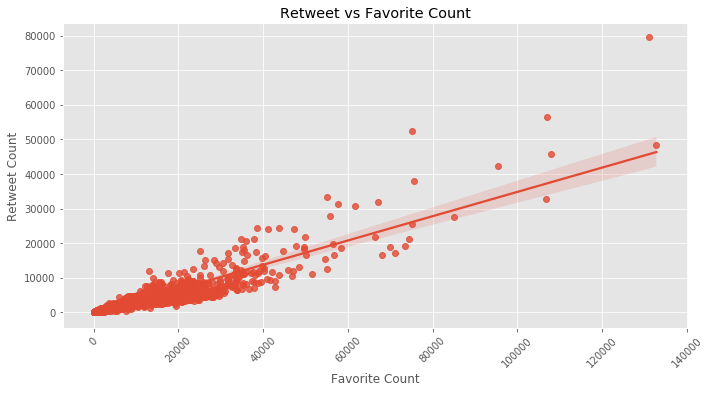

In [233]:
sns.lmplot(x='favorite_count',
           y='retweet_count',
          data=df_combined,size=5,aspect=2)
plt.xticks(rotation=45)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Retweet vs Favorite Count');

From the above lmplot (scatter plus a regression line), we can see a strong positive correlation between Retweet Count and Favorite count. As both are measures of overall popularity, this correlation was expected. 

In [107]:
names = df_combined.query('name != "None" & name != "a" & name != "the"')['name'].value_counts()
top_ten_names = names.head(10)

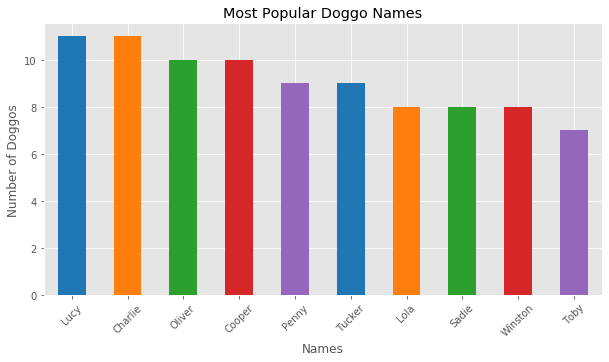

In [236]:
my_colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

top_ten_names.plot(kind='bar',color=my_colors,figsize=(10,5))

plt.title('Most Popular Doggo Names')
plt.xlabel('Names')
plt.ylabel('Number of Doggos')
plt.xticks(rotation= 45);


Now I'll take a look at the highest average rating per predicted dog breed

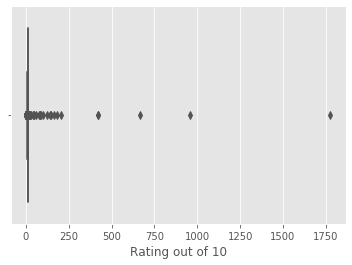

In [242]:
sns.boxplot(x='rating_numerator',data = df_combined)
plt.xlabel('Rating out of 10');

There are a lot of outliers here, which may not greatly affect the mean too much, but I might cut these off at 100 (to allow for *some* outlandishness!)

In [158]:
df_combined_no_outliers = df_combined.query('rating_numerator < 100')


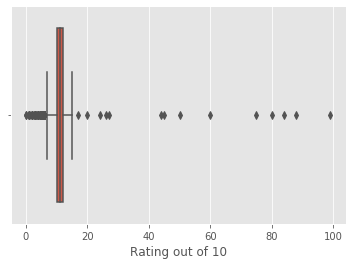

In [243]:
sns.boxplot(x='rating_numerator',data=df_combined_no_outliers)
plt.xlabel('Rating out of 10');

In [238]:
df_combined.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

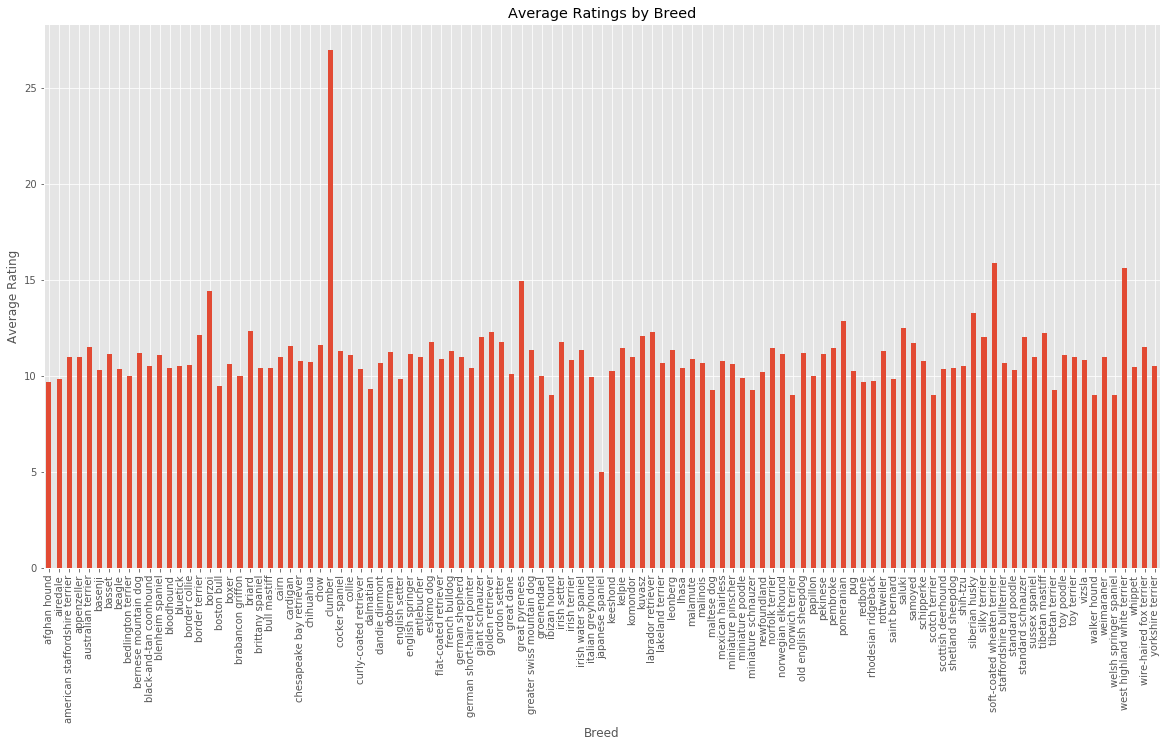

In [220]:
df_combined_no_outliers[df_combined_no_outliers['p1_dog'] == True].groupby('p1')['rating_numerator'].mean().plot(kind='bar',
                                                                                                                figsize=(20,10))
plt.title('Average Ratings by Breed')
plt.xlabel('Breed')
plt.ylabel('Average Rating');

Cool, but this dataset clearly has too many dog breeds for this to be an effective or readable visualisation. I'll create two plots: 1 for dogs with an above average mean rating, and one for dogs with ratings below the mean rating. 

In [223]:
dog_means = df_combined_no_outliers[df_combined_no_outliers['p1_dog'] == True].groupby('p1')['rating_numerator'].mean()
print("Average dog rating:",dog_means.mean())

Average dog rating: 11.0352093461016


#### Above Average

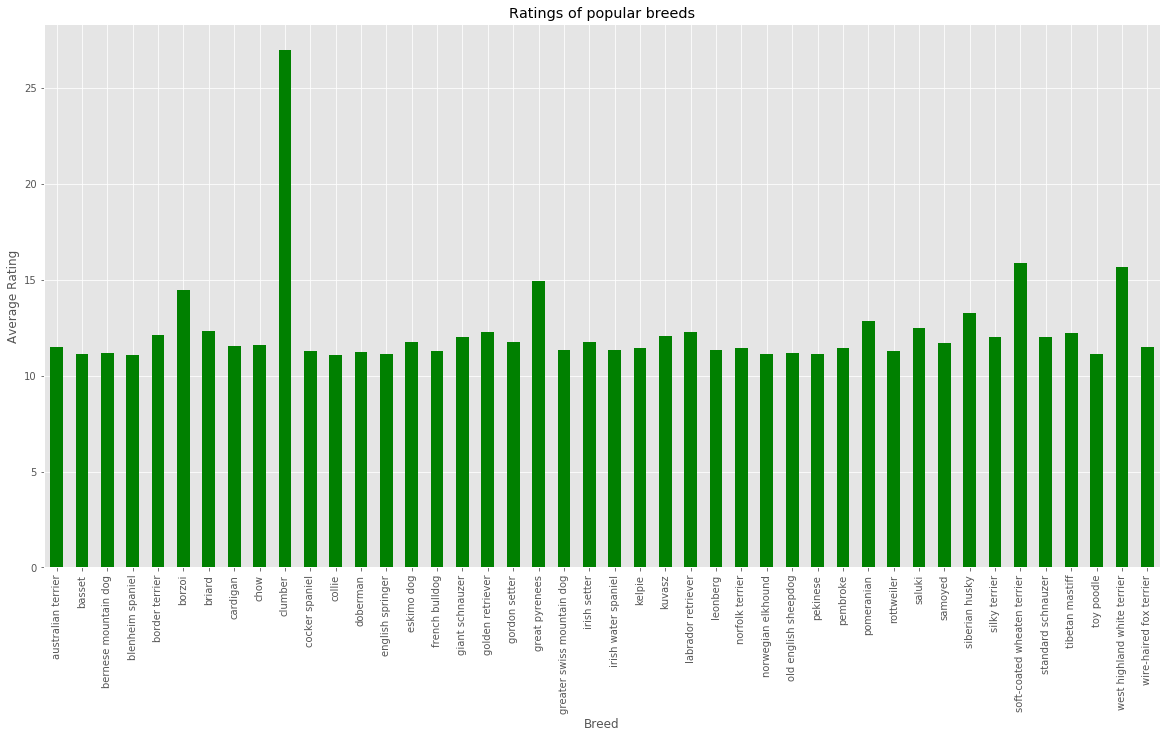

In [246]:
dog_means[dog_means > dog_means.mean()].plot(kind='bar',figsize=(20,10),color='g')
plt.title('Ratings of popular breeds')
plt.xlabel('Breed')
plt.ylabel('Average Rating');

#### Below average

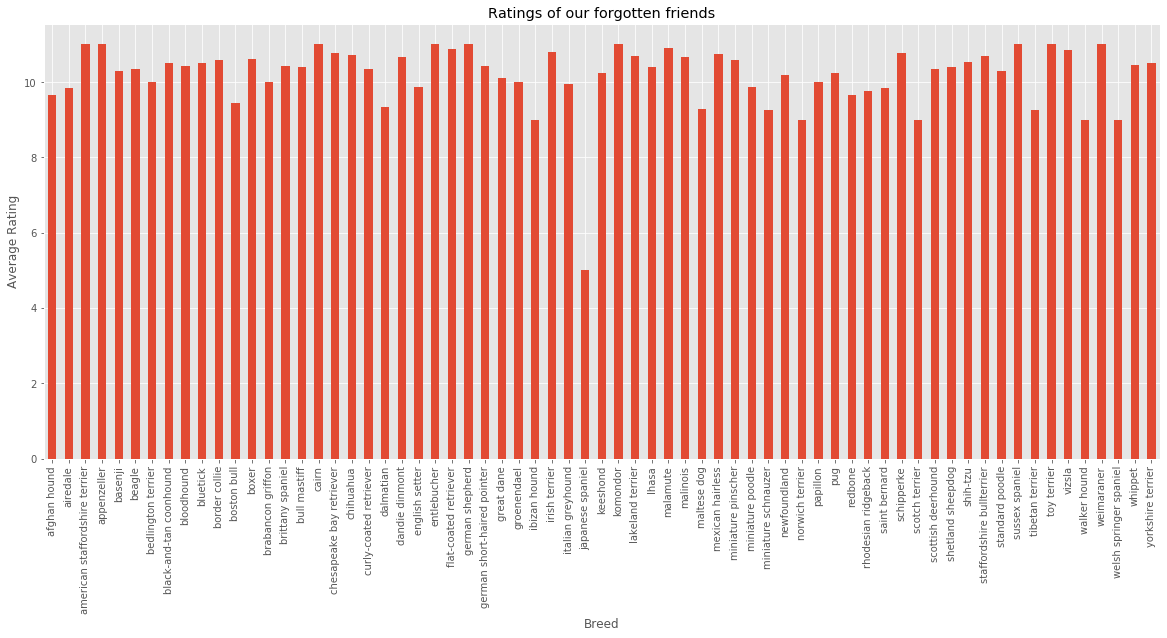

In [225]:
dog_means[dog_means < dog_means.mean()].plot(kind='bar',figsize=(20,8))
plt.title('Ratings of our forgotten friends')
plt.xlabel('Breed')
plt.ylabel('Average Rating');

And just for a laugh, let's see which dog breeds (or other random entity the NN found) scored those ridiculously high ratings

In [207]:
df_outliers = df_combined[(df_combined.p1.notnull()) & (df_combined.rating_numerator > 100)]

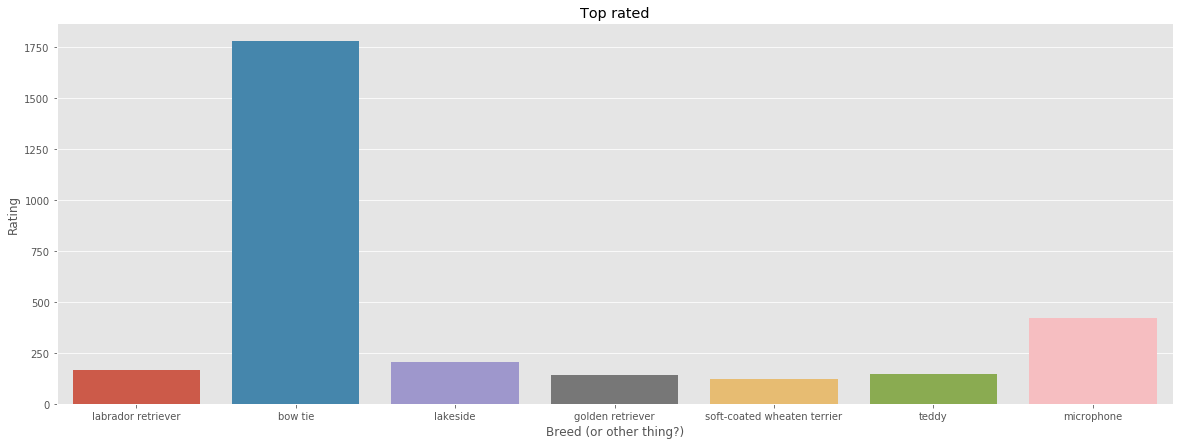

In [249]:
fig, ax = plt.subplots(figsize=(20,7))

sns.barplot(ax = ax, x = 'p1', y='rating_numerator',data=df_outliers)
plt.title('Top rated')
plt.ylabel('Rating')
plt.xlabel('Breed (or other thing?)');

And the same for dogs only

In [210]:
df_outliers_dogs = df_combined[(df_combined.p1.notnull()) & (df_combined.rating_numerator > 100) & (df_outliers.p1_dog ==True)]

Text(0.5, 0, 'Doggo')

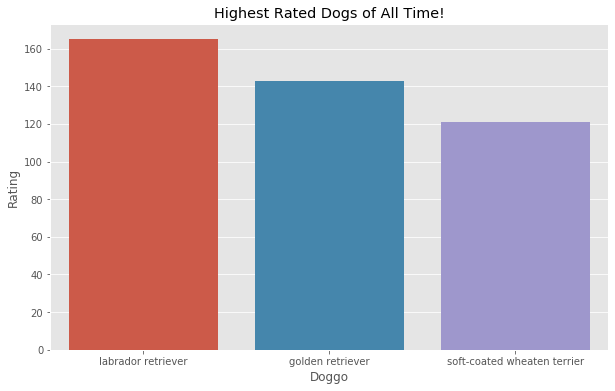

In [227]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax = ax, x = 'p1', y='rating_numerator',data=df_outliers_dogs)
plt.title('Highest Rated Dogs of All Time!')
plt.ylabel('Rating')
plt.xlabel('Doggo')